In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Generic Packages
import numpy as np
import os
import pandas as pd

#Machine Learning Library
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

#Plotting Libraries
import seaborn as sn; sn.set(font_scale=1.4)
import matplotlib.pyplot as plt

#openCV
import cv2

#Tensor Flow
import tensorflow as tf

#Display Progress
from tqdm import tqdm

from skimage.transform import resize
from skimage.io import imread

In [ ]:
categories = []
rootdir = '/content/drive/MyDrive/project3/data/traindata/kfood2/'
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
      for category in os.listdir(d):
        b = os.path.join(d)
        if os.path.isdir(b):
          categories.append(category)

categories_label = {category:i for i, category in enumerate(categories)} # 카테고리랑 숫자로 바꾼 값 dict형태로 만들기

In [ ]:
categories_label

{'매운탕': 0,
 '갈비탕': 1,
 '곰탕_설렁탕': 2,
 '감자탕': 3,
 '삼계탕': 4,
 '추어탕': 5,
 '고추튀김': 6,
 '새우튀김': 7,
 '오징어튀김': 8,
 '약식': 9,
 '한과': 10,
 '약과': 11,
 '멍게': 12,
 '산낙지': 13,
 '물회': 14,
 '육회': 15,
 '갈비구이': 16,
 '갈치구이': 17,
 '고등어구이': 18,
 '곱창구이': 19,
 '장어구이': 20,
 '떡갈비': 21,
 '더덕구이': 22,
 '불고기': 23,
 '조개구이': 24,
 '삼겹살': 25,
 '조기구이': 26,
 '닭갈비': 27,
 '훈제오리': 28,
 '황태구이': 29,
 '계란국': 30,
 '떡국_만두국': 31,
 '무국': 32,
 '미역국': 33,
 '시래기국': 34,
 '콩나물국': 35,
 '육개장': 36,
 '북엇국': 37,
 '젓갈': 38,
 '양념치킨': 39,
 '과메기': 40,
 '콩자반': 41,
 '편육': 42,
 '피자': 43,
 '후라이드치킨': 44,
 '갓김치': 45,
 '깍두기': 46,
 '나박김치': 47,
 '무생채': 48,
 '배추김치': 49,
 '백김치': 50,
 '부추김치': 51,
 '열무김치': 52,
 '오이소박이': 53,
 '파김치': 54,
 '총각김치': 55,
 '가지볶음': 56,
 '시금치나물':

In [ ]:
def load_data():

  rootdir = '/content/drive/MyDrive/project3/data/traindata/kfood2/'
  images = []
  labels = []
  for file in os.listdir(rootdir):
    datadir = os.path.join(rootdir, file)
    # Iterate through each folder corresponding to a category
    for category in os.listdir(datadir):
      categorypath = os.path.join(datadir,category)
      label = categories_label[category]

# Iterate through each image in our folder
      for idx,img in tqdm(enumerate(os.listdir(categorypath))):
        if idx == 100:
          break
        # Get the path name of the image
        img_path = os.path.join(categorypath, img)
        try:
          # Open and resize the img
          image = cv2.imread(img_path)
          #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
          image = cv2.resize(image,(150, 150))

          # Append the image and its corresponding label to the output
          images.append(image)
          labels.append(label)
        except Exception as someReadingError:
          pass

  return images , labels

In [ ]:
#Loading Data (Training & Test Dataset)
Images, Labels = load_data()

100it [00:32,  3.08it/s]
100it [00:24,  4.05it/s]
100it [00:23,  4.32it/s]
100it [00:31,  3.21it/s]
100it [00:28,  3.46it/s]
100it [00:32,  3.06it/s]
100it [00:27,  3.65it/s]
100it [00:34,  2.86it/s]
100it [00:20,  4.96it/s]
100it [00:27,  3.69it/s]
100it [00:16,  6.10it/s]
100it [00:18,  5.51it/s]
100it [00:18,  5.36it/s]
100it [00:18,  5.32it/s]
100it [00:30,  3.31it/s]
100it [00:16,  6.01it/s]
100it [00:17,  5.62it/s]
100it [00:17,  5.82it/s]
100it [00:18,  5.40it/s]
100it [00:17,  5.73it/s]
100it [00:18,  5.44it/s]
100it [00:18,  5.46it/s]
100it [00:17,  5.66it/s]
100it [00:18,  5.34it/s]
100it [00:16,  6.16it/s]
100it [00:45,  2.21it/s]
100it [00:16,  6.14it/s]
100it [00:20,  4.89it/s]
100it [00:16,  6.20it/s]
100it [00:17,  5.66it/s]
100it [00:17,  5.64it/s]
100it [00:17,  5.66it/s]
100it [00:20,  4.99it/s]
100it [00:20,  4.95it/s]
100it [00:17,  5.59it/s]
100it [00:19,  5.03it/s]
100it [00:18,  5.32it/s]
100it [00:19,  5.26it/s]
100it [00:18,  5.39it/s]
100it [01:05,  1.54it/s]


In [ ]:
X=np.array(Images)
Y=np.array(Labels)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11265, 150, 150, 3), (2817, 150, 150, 3), (11265,), (2817,))

In [ ]:
# 0 ~ 1 값으로 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
71/71 [==============================] - 4s 40ms/step - loss: nan - accuracy: 0.0070 - val_loss: nan - val_accuracy: 0.0071
Epoch 2/20
71/71 [==============================] - 2s 35ms/step - loss: nan - accuracy: 0.0068 - val_loss: nan - val_accuracy: 0.0071
Epoch 3/20
71/71 [==============================] - 2s 35ms/step - loss: nan - accuracy: 0.0068 - val_loss: nan - val_accuracy: 0.0071
Epoch 4/20
71/71 [==============================] - 2s 35ms/step - loss: nan - accuracy: 0.0068 - val_loss: nan - val_accuracy: 0.0071
Epoch 5/20
71/71 [==============================] - 3s 35ms/step - loss: nan - accuracy: 0.0068 - val_loss: nan - val_accuracy: 0.0071
Epoch 6/20
71/71 [==============================] - 3s 35ms/step - loss: nan - accuracy: 0.0068 - val_loss: nan - val_accuracy: 0.0071
Epoch 7/20
71/71 [==============================] - 3s 35ms/step - loss: nan - accuracy: 0.0068 - val_loss: nan - val_accuracy: 0.0071
Epoch 8/20
71/71 [==============================] - 2s 

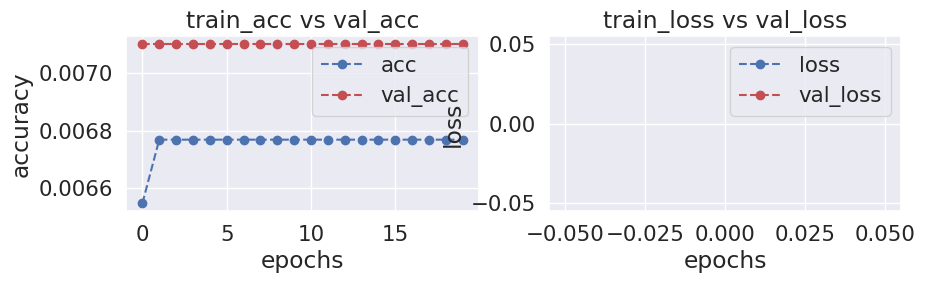

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

plot_accuracy_loss(history)

In [ ]:
predictions = model.predict(X_test)

# Convert the logits to probabilities
probabilities = tf.nn.softmax(predictions)

# Get the class with the highest probability
predicted_classes = np.argmax(probabilities, axis=1)

# Compare the predicted classes with the actual classes
comparison = list(zip(predicted_classes, y_test))

# Display the first 10 predictions and actual values
for i in range(10):
    print(f'Predicted: {predicted_classes[i]}, Actual: {y_test[i]}')

89/89 [==============================] - 1s 5ms/step
Predicted: 0, Actual: 69
Predicted: 0, Actual: 52
Predicted: 0, Actual: 141
Predicted: 0, Actual: 29
Predicted: 0, Actual: 3
Predicted: 0, Actual: 84
Predicted: 0, Actual: 55
Predicted: 0, Actual: 43
Predicted: 0, Actual: 50
Predicted: 0, Actual: 56
